####     Problem Statement:######   
Analyze and Provide Insights on Amazon Sales Report###    

Problem DesctiipƟo######   The provided dataset contains information about sales transactions on Amazon, including details such as order######   
ID, date, status,fulfillmentt method, sales channel, product category, size,quantityy, amount, shipping details,######   
and more. Thobjectiveve is to conduct a comprehensive analysis of the data and extract ticƟonable insights t######   o
support business decision-makins####     p=sharingti

Ke###### y ObjecƟves:
1. Sales Overview: Understand the overall sales performance, ttrends, andopaƩe###### rns over Ɵme.
2. Product Analysis: Analytie the distribuƟon of product categories, titizes, and quanƟƟtis sold to i###### denƟfy pop###### ular
products.
3. Fulfillmenti Analysis: InvesƟgate the fulfillment methods usetivand their effecƟveness in de###### livering orders.
4.tiCustomer SegmentaƟon: Segment customers basebehaviorr buyitig behaviour, locaƟon, a###### nd other ###### relevant
factors.
5. Geographical Analysis: Explore the gtiographical distribuƟon of sales, focusting o###### n states and ciƟes.
6. BusinesstiInsights: Provide acrecommendationsts and recommendaƟons based tn the analy###### sis to opƟmize sales
strategieti, imtiroe customer saƟsfacƟon, and enhance overall b#### usiness perfor##### mance.

Deliverables:
1. Comprehensive analysis report summarizing keyrecommendationsig##### hts, and rectimmendaƟons.
2. Visuaillustrateharts, graphs) illustraƟng various aspe##### cts of the data analysis.
3. Insights on probehaviorerences, customer behaviour, and tieogr##### aphical salestidistribuƟon.
4. RecommendaƟons for improving sales strategies, inventory managem#### ent, and customer ##### serconductingExpected Outcome:
By conducƟng a thorough analysis of the Amazon sales report, the goal is to gain#####  valuable insigtits that can beoperationsed to opƟmize business operaƟons, enhance customer experience##### , and drive revenue growthtioThe
arecommendations provide acƟonable recommendaƟons tailored to the spec##### ific needs and challenges of the
business.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("Amazon Sale Report.csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [6]:
df['Amount'].fillna(df['Amount'].median(), inplace=True)
df['Qty'].fillna(df['Qty'].median(), inplace=True)

In [7]:
for col in ['ship-city','ship-state','ship-postal-code','ship-country']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [8]:
df['currency'].fillna('Unknown', inplace=True)
df['fulfilled-by'].fillna('Unknown', inplace=True)

In [9]:
df.drop(columns=['New', 'PendingS'], inplace=True)

In [10]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3304\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [12]:
categorical_columns = ['Status', 'Category', 'Sales Channel', 'ship-service-level', 'Courier Status', 'fulfilled-by', 'B2B']
df[categorical_columns] = df[categorical_columns].astype('category')

In [13]:
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  category      
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  category      
 6   ship-service-level  128976 non-null  category      
 7   Category            128976 non-null  category      
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  category      
 10  Qty                 128976 non-null  int64         
 11  currency            128976 non-null  object        
 12  Amount              128976 non-null  float64       
 13  ship-city           128976 no

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Unknown
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,Unknown
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,Unknown
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,Unknown
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,Unknown


### 1. Sales Overview: Understand the overall sales performance, trends, and patterns over time.

In [17]:
df['Month'] = df['Date'].dt.to_period('M')

In [18]:
sales_over_time = df.groupby('Month')['Amount'].sum()

In [19]:
sales_over_time_sorted = sales_over_time.sort_index()

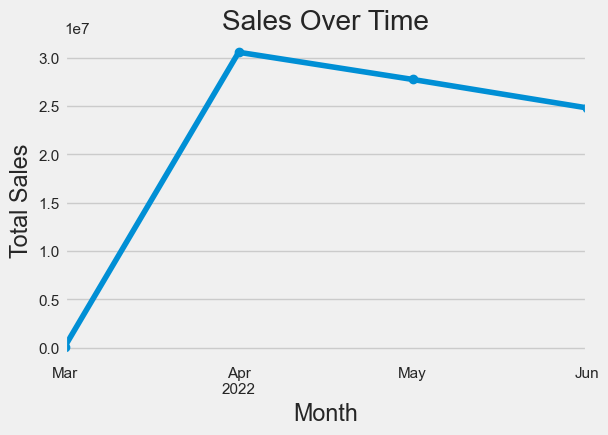

In [26]:
plt.figure(figsize=(6,4))
sales_over_time.plot(kind='line', marker = 'o', title= 'Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

#### This graph of total sales shows that the sales are increased from march to april and then slightly drop till jun. its states that the sales are higher as april comes.

### 2. Product Analysis: Analyze the distribution of product categories, sizes, and quantities sold to identify popular products..

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3304\2743361781.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_sales = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)


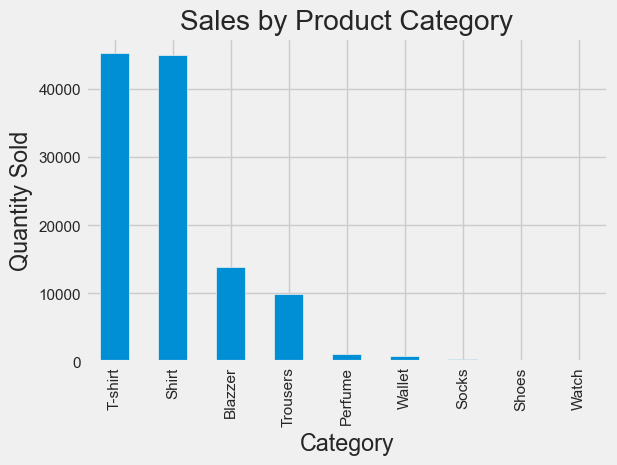

In [27]:
product_sales = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)
plt.figure(figsize=(6,4))
product_sales.plot(kind='bar', title='Sales by Product Category')
plt.ylabel('Quantity Sold')
plt.xlabel('Category')
plt.show()

#### From above bar chart we predict that T-shirts and Shirts are of highest sales of range                                                                  T-shirts>Shirt>Blazzer>Trousers>Perfume>Wallet>Socks>Shoes>Watch

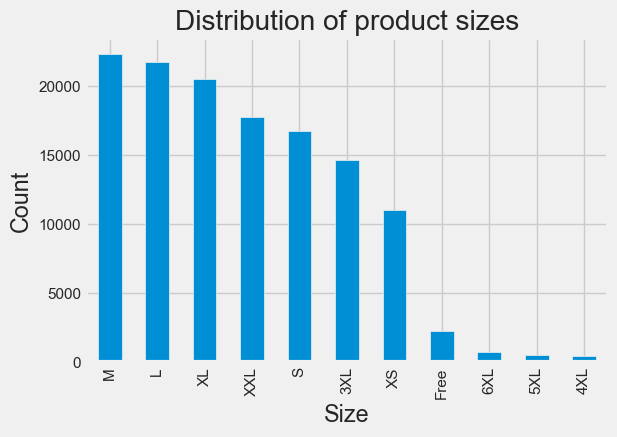

In [28]:
size_distribution = df['Size'].value_counts()
plt.figure(figsize=(6,4))
size_distribution.plot(kind='bar', title='Distribution of product sizes')
plt.ylabel('Count')
plt.xlabel('Size')
plt.show()



#### From above bar chart we predict that the size M has the highest sales range from M>L>XL>XXL>S>3XL>XS>Free>6XL>5XL>4XL

### 3. Fulfillment Analysis: Investigate the fulfillment methods used and their effectiveness in delivering orders.

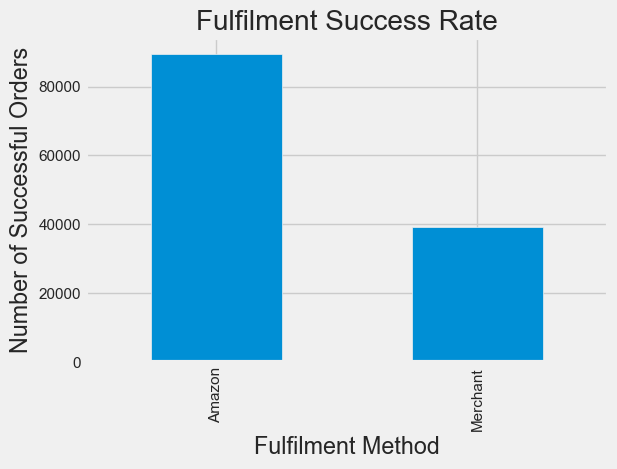

In [29]:
fulfilment_effectiveness = df.groupby('Fulfilment')['Order ID'].count()

plt.figure(figsize=(6, 4))
fulfilment_effectiveness.plot(kind='bar', title='Fulfilment Success Rate')
plt.ylabel('Number of Successful Orders')
plt.xlabel('Fulfilment Method')
plt.show()

#### This shows that the Amazon has highest fulfillment rate 

### 4. Customer Segmentation: Segment customers based on their buying behaviour, location, and other relevant factors.

In [24]:
df['Total_Purchase_Frequency'] = df.groupby('Order ID')['Order ID'].transform('count')
df['Avg_Spending'] = df.groupby('Order ID')['Amount'].transform('mean')

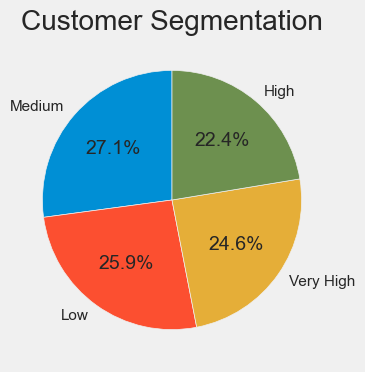

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df['Customer_Segment'] = pd.qcut(df['Amount'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

customer_segments = df['Customer_Segment'].value_counts()

plt.figure(figsize=(6,4))
customer_segments.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Customer Segmentation')
plt.ylabel('')  
plt.show()

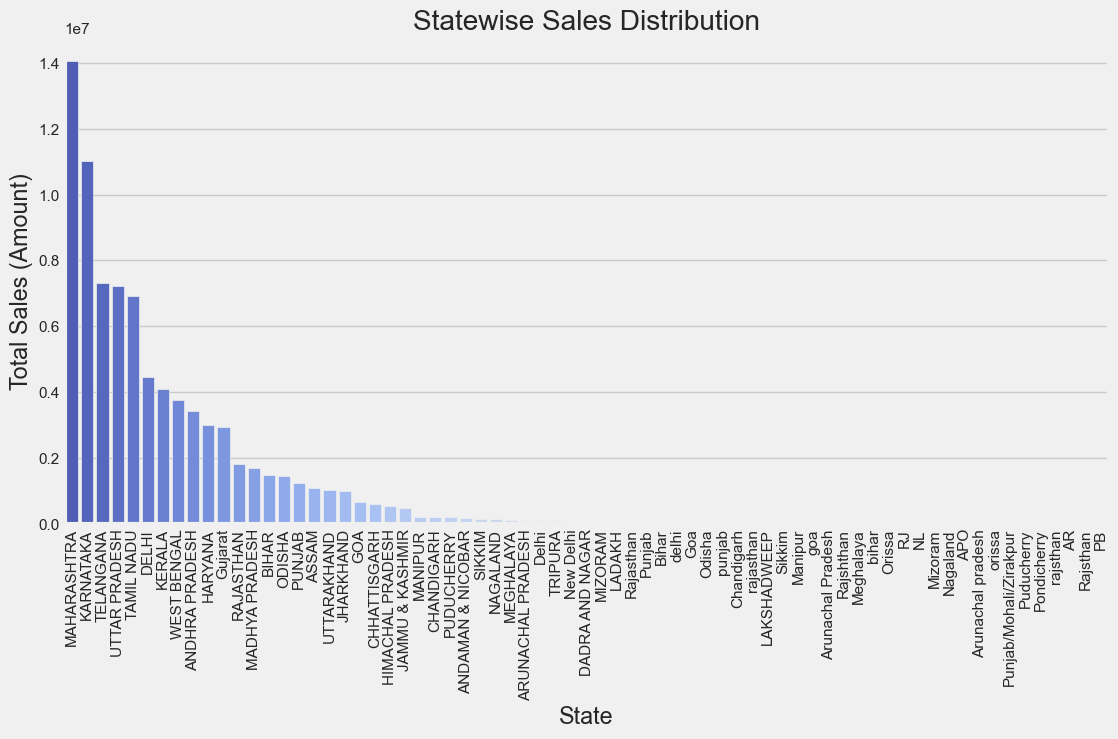

In [26]:
statewise_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=statewise_sales.index, y=statewise_sales.values, palette='coolwarm')
plt.title('Statewise Sales Distribution')
plt.xlabel('State')
plt.ylabel('Total Sales (Amount)')
plt.xticks(rotation=90)
plt.show()

#### This shows that the Maharashtra state has highest number of purchased from amazon 

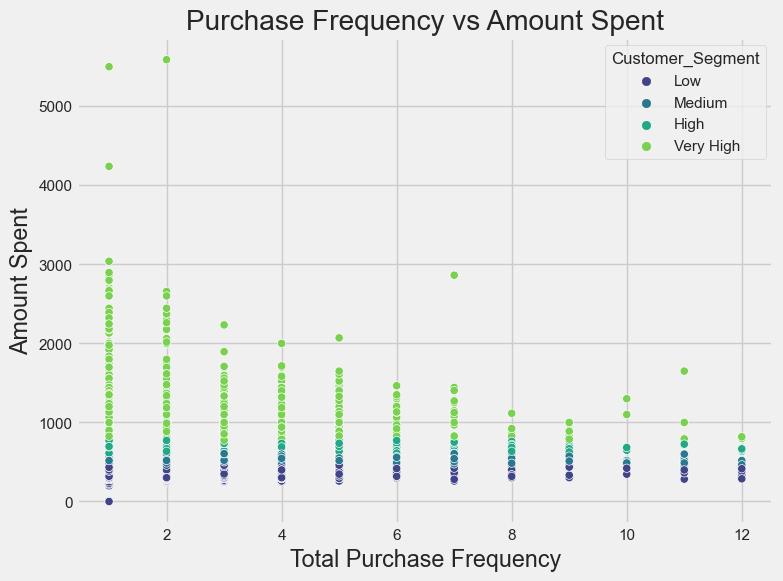

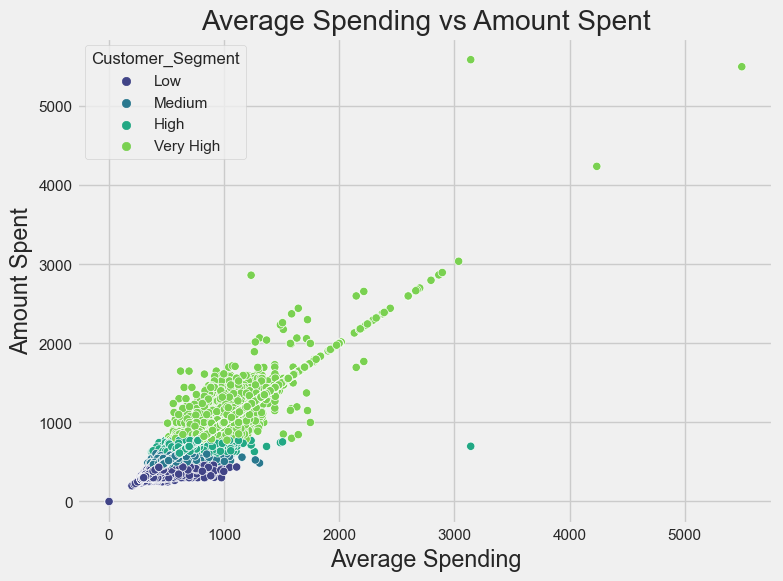

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Purchase_Frequency', y='Amount', hue='Customer_Segment', data=df, palette='viridis')
plt.title('Purchase Frequency vs Amount Spent')
plt.xlabel('Total Purchase Frequency')
plt.ylabel('Amount Spent')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg_Spending', y='Amount', hue='Customer_Segment', data=df, palette='viridis')
plt.title('Average Spending vs Amount Spent')
plt.xlabel('Average Spending')
plt.ylabel('Amount Spent')
plt.show()

### 

### 5. Geographical Analysis: Explore the geographical distributin of sales, focusing on states and cities.

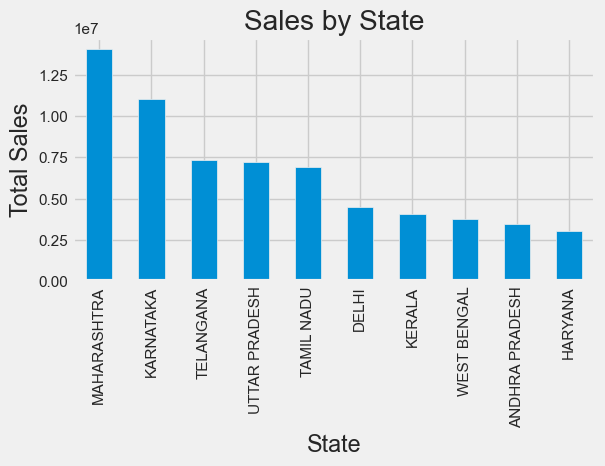

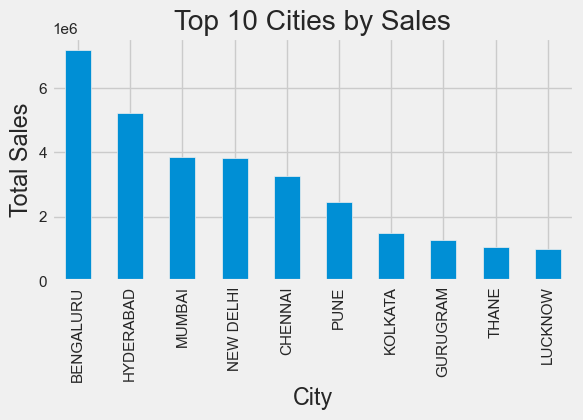

In [39]:
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(6,3))
state_sales.plot(kind='bar', title='Sales by State')
plt.ylabel('Total Sales')
plt.xlabel('State')
plt.show()

city_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(6,3))
city_sales.plot(kind='bar', title='Top 10 Cities by Sales')
plt.ylabel('Total Sales')
plt.xlabel('City')
plt.show()

#### From above visualization it is seen that the Maharashtra state has highest sales rate, and by cities Bengluru has highest sale.

### 6. Business Insights: Provide actionable insights and recommendations based on the analysis to optimize sale strategies, improve customer satisfaction, and enhance overall business performance.

In [38]:
summary = """
1. Sales Trends: total sales shows that the sales are increased from march to april and then slightly drop till jun. its states that the sales are higher as april comes.
2. Top Products: From above bar chart we predict that T-shirts and Shirts are of highest sales of size M and L the order is T-shirts>Shirt>Blazzer>Trousers>Perfume>Wallet>Socks>Shoes>Watch with size 
3. Fulfillment: Fulfillment by Amazon has the highest success rate, and efforts should be made to increase its usage.
4. Customer Segmentation: Customers who spend in the 'Medium' segment contribute to the majority of sales.
5. Geographical Distribution: Sales are concentrated in Maharashtra, Karnataka indicating a strong market presence in these states. by cities Bengluru has highest sale.
"""

# Display the summary
print(summary)



1. Sales Trends: total sales shows that the sales are increased from march to april and then slightly drop till jun. its states that the sales are higher as april comes.
2. Top Products: From above bar chart we predict that T-shirts and Shirts are of highest sales of size M and L the order is T-shirts>Shirt>Blazzer>Trousers>Perfume>Wallet>Socks>Shoes>Watch with size 
3. Fulfillment: Fulfillment by Amazon has the highest success rate, and efforts should be made to increase its usage.
4. Customer Segmentation: Customers who spend in the 'Medium' segment contribute to the majority of sales.
5. Geographical Distribution: Sales are concentrated in Maharashtra, Karnataka indicating a strong market presence in these states. by cities Bengluru has highest sale.

